In [1]:
!nvidia-smi

Mon Nov 24 13:08:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.229 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6567.0/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 53.0ms
Speed: 5.7ms preprocess, 53.0ms inference, 171.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


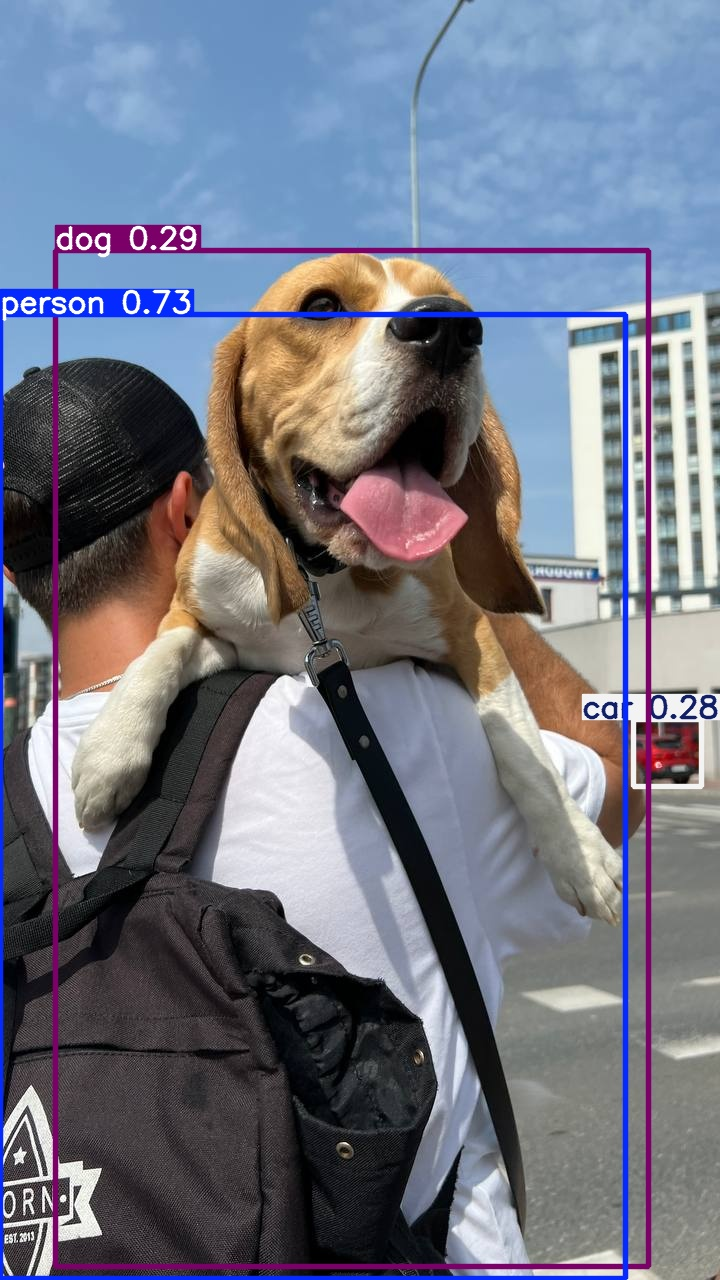

In [31]:
%cd {HOME}
Image(filename='/kaggle/working/runs/detect/predict/dog.jpeg', height=600)

## Python SDK

In [32]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


In [33]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0755, 1278.1947],
        [  55.1730,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [34]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [35]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Preparing a custom dataset

In [ ]:
# !mkdir -p {HOME}/datasets
# %cd {HOME}/datasets

# !pip install roboflow==1.1.48 --quiet

# import roboflow

# roboflow.login()

# rf = roboflow.Roboflow()

# project = rf.workspace("model-examples").project("football-players-obj-detection")
# dataset = project.version(2).download("yolov8")

In [3]:
!pip install roboflow

from IPython import display
display.clear_output()

In [5]:
!pip install supervision

from IPython import display
display.clear_output()

In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key="E6klOjeOgdAuTJyFXCpD")
project = rf.workspace("objectdetection-wdigz").project("person-detection-9a6mk-vrkcu")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-detection-2 in yolov8:: 100%|██████████| 5102/5102 [00:02<00:00, 1774.65it/s]


## Custom Training

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=/kaggle/input/10-03-50epochs/pytorch/default/1/best.pt data={dataset.location}/data.yaml epochs=1 imgsz=800 plots=True

/kaggle/working
Ultralytics 8.3.229 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Person-detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/10-03-50epochs/pytorch/default/1/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=Fal

## Evaluate

In [17]:
!yolo task=detect mode=val model=/kaggle/input/10-03-50epochs/pytorch/default/1/best.pt data={dataset.location}/data.yaml imgsz=800

Ultralytics 8.3.229 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3132.1±1310.4 MB/s, size: 235.1 KB)
val: Scanning /kaggle/working/Person-detection-2/valid/labels.cache... 1071 images, 44 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1071/1071 16.4Mit/s 0.0ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 67/67 4.9it/s 13.8s0.2s
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all       1071       2293      0.842      0.738      0.835      0.556
Speed: 1.8ms preprocess, 3.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved

## Test

In [18]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
from ultralytics import YOLO

yolo = YOLO('/kaggle/input/head-detect/pytorch/default/1/best (3).pt')


image 1/1 /kaggle/input/classroom-images/Screenshot 2025-08-07 110026.png: 480x800 29 heads, 38.4ms
Speed: 3.2ms preprocess, 38.4ms inference, 13.7ms postprocess per image at shape (1, 3, 480, 800)


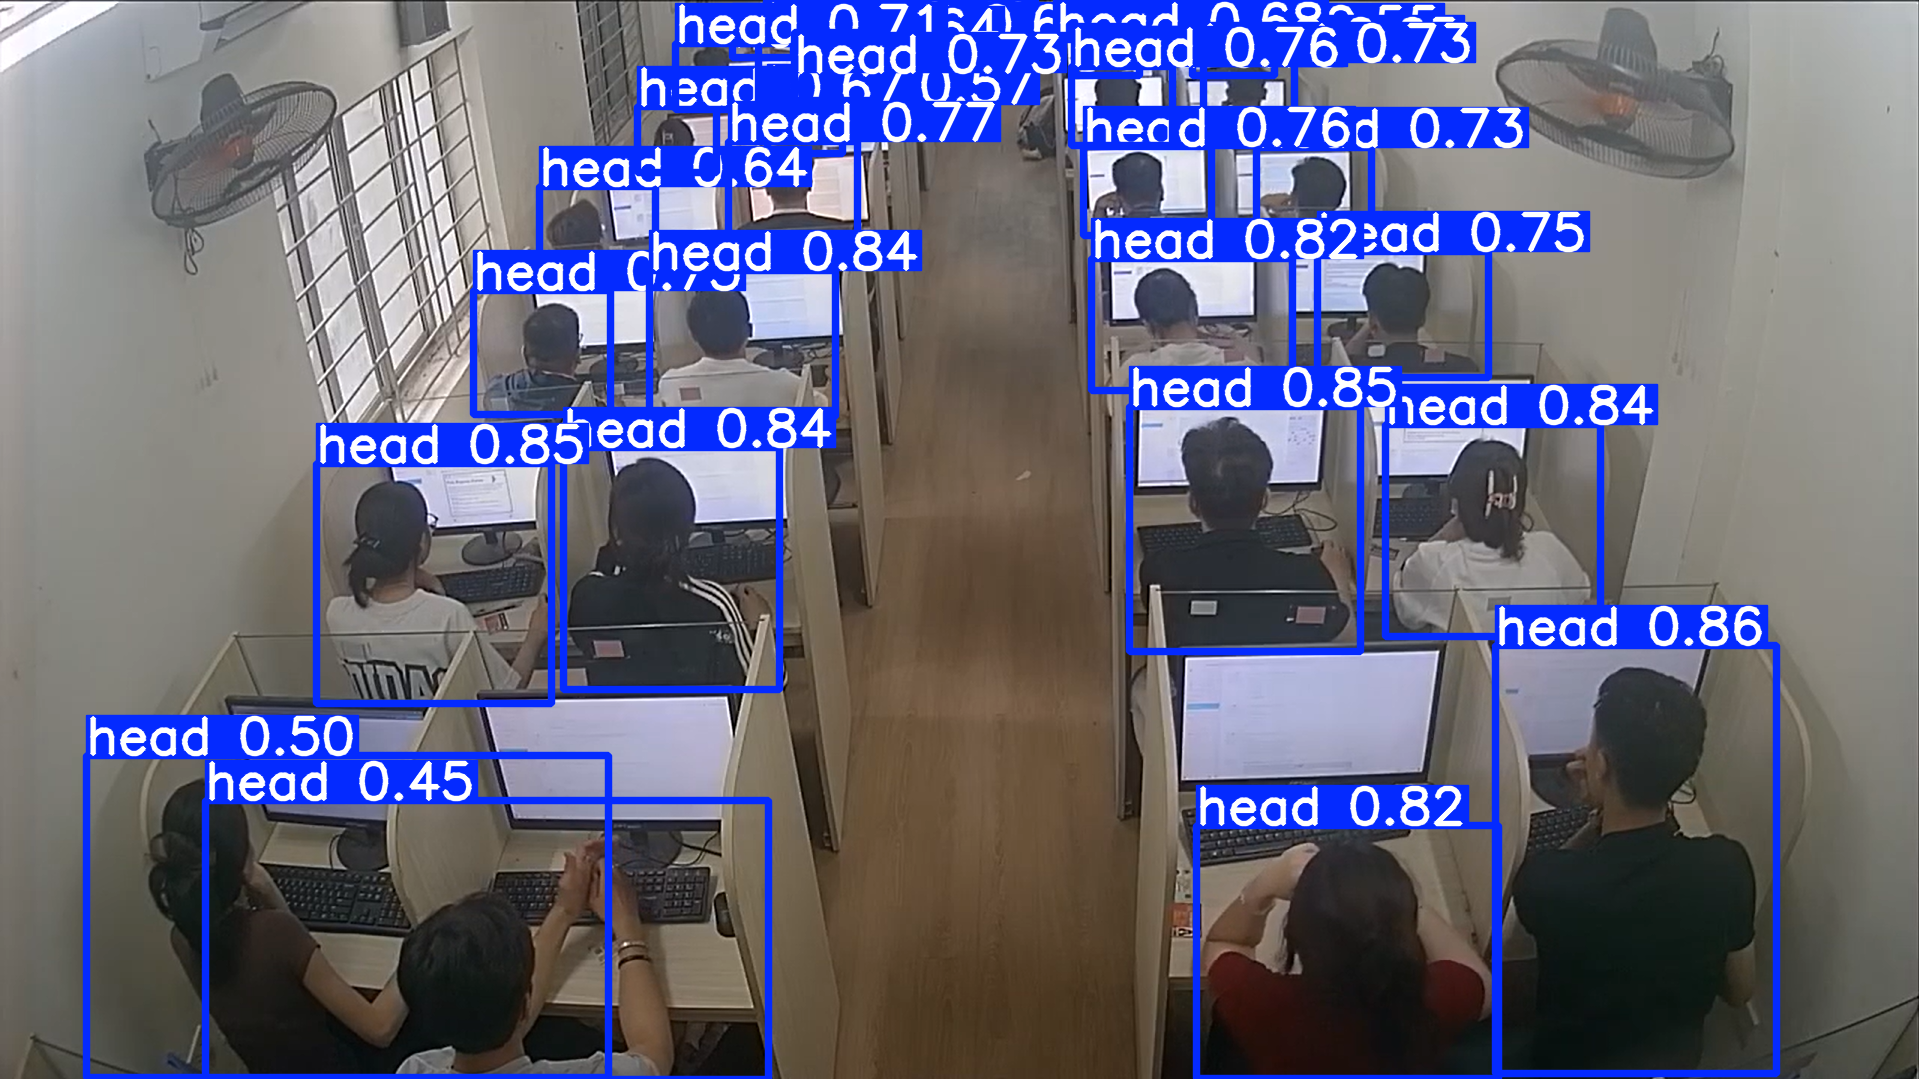

In [16]:
results = yolo('/kaggle/input/classroom-images/Screenshot 2025-08-07 110026.png')
results[0].show()

## Test video

In [29]:
import supervision as sv
import numpy as np

box_annotator = sv.BoxAnnotator(thickness=2)  # Bounding box annotator

In [37]:
SOURCE_VIDEO_PATH = '/kaggle/input/back-long-action/Ch06_CH 06_2008.avi'
TARGET_VIDEO_PATH = f"{HOME}/test_video.mp4"

In [31]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    # detect
    results = yolo(frame, imgsz=1280)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]

    # annotate
    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)

    return annotated_frame

In [ ]:
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,   # Path to input video
    target_path=TARGET_VIDEO_PATH,   # Path to save output video
    callback=process_frame               # Function to process each frame
)

## Test video with Zones

In [29]:
import numpy as np

In [31]:
def load_zones_config(data) -> List[np.ndarray]:
    """
    Load polygon zone configurations from a JSON file.

    This function reads a JSON file which contains polygon coordinates, and
    converts them into a list of NumPy arrays. Each polygon is represented as
    a NumPy array of coordinates.

    Args:
        file_path (str): The path to the JSON configuration file.

    Returns:
        List[np.ndarray]: A list of polygons, each represented as a NumPy array.
    """
    return [np.array(polygon, np.int32) for polygon in data]

In [62]:
class VideoProcessor:
    def __init__(self,
        source_weights_path: str,
        source_video_path: str,
        target_video_path: str,
        polygons: List[List[tuple]],
        confidence_threshold: float = 0.3,
        iou_threshold: float = 0.7

    ) -> None:
        self.source_video_path = source_video_path
        self.target_video_path = target_video_path

        self.model = YOLO(source_weights_path)

        self.video_info = sv.VideoInfo.from_video_path(source_video_path)

        self.polygons = polygons

        self.zones = [
            sv.PolygonZone(polygon=polygon) for polygon in polygons
        ]

        self.zone_annotators = [
            sv.PolygonZoneAnnotator(
                zone=zone,
                color=colors.by_idx(index),
                thickness=4,
                text_thickness=8,
                text_scale=4
            )
            for index, zone in enumerate(self.zones)
        ]
        
        # self.box_annotators = [
        #     sv.BoxAnnotator(
        #         color=colors.by_idx(index),
        #         thickness=4,
        #     )
        #     for index in range(len(self.polygons))
        # ]
        
        # self.trace_annotators = [
        #     sv.TraceAnnotator(
        #         color=colors.by_idx(index), 
        #         position=sv.Position.CENTER, 
        #         trace_length=100, 
        #         thickness=2
        #     ) for index in range(len(self.polygons))
        # ]
        
        self.color_annotators = [
            sv.ColorAnnotator(
                color=colors.by_idx(index)
            )
            for index in range(len(self.polygons))
        ]

        # self.label_annotator = sv.LabelAnnotator(
        #     text_color=sv.Color.BLACK
        # )

        
    def process_video(self):
        frame_generator = sv.get_video_frames_generator(
            source_path=self.source_video_path
        )
        with sv.VideoSink(self.target_video_path, self.video_info) as sink:
            for frame in tqdm(frame_generator, total=self.video_info.total_frames):
                annotated_frame = self.process_frame(frame)
                sink.write_frame(annotated_frame)

    def annotate_frame(self, frame: np.ndarray, detections: sv.Detections) -> np.ndarray:
        annotated_frame = frame.copy()
        # labels = [
        #     f"{tracker_id}" for tracker_id in detections.tracker_id
        # ]
        # annotated_frame = self.label_annotator.annotate(annotated_frame, detections, labels)

        # for zone, zone_annotator, box_annotator, color_annotator, trace_annotator in zip(self.zones, self.zone_annotators, self.box_annotators, self.color_annotators, self.trace_annotators):
        for zone, zone_annotator, color_annotator in zip(self.zones, self.zone_annotators, self.color_annotators):
            mask = zone.trigger(detections=detections)
            detections_filtered = detections[mask]
            # annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections_filtered)
            annotated_frame = color_annotator.annotate(scene=annotated_frame, detections=detections_filtered)
            # annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=detections_filtered)
            annotated_frame = zone_annotator.annotate(scene=annotated_frame)
        
        return annotated_frame

    def process_frame(self, frame: np.ndarray) -> np.ndarray:
        result = self.model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(result)
        # detections = self.tracker.update_with_detections(detections) #detection with tracker_id

        detections_in_zones = [] #tạo list rỗng chứa các detection trong các zone

        for zone in self.zones:
            mask = zone.trigger(detections=detections) #duyệt và thêm các detection trong từng zone vào list
            detections_in_one_zone = detections[mask]
            detections_in_zones.append(detections_in_one_zone)
        detections = sv.Detections.merge(detections_in_zones)
    
        return self.annotate_frame(frame, detections) #chỉ annotate các detection trong zone

In [63]:
from tqdm import tqdm

polygons = load_zones_config([[[601, 154], [902, 153], [946, 4], [692, 3]], [[575, 178], [899, 177], [786, 833], [39, 832]], [[1021, 1], [1029, 152], [1390, 140], [1264, 2]], [[1034, 156], [1392, 148], [1527, 829], [1087, 821]]])

COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])
colors = sv.ColorPalette.DEFAULT

In [ ]:
processor = VideoProcessor('/kaggle/input/head-detect/pytorch/default/1/best (3).pt', SOURCE_VIDEO_PATH, TARGET_VIDEO_PATH, polygons)
processor.process_video()

In [1]:
import sys
import numpy as np
import scipy
import sympy

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("SymPy:", sympy.__version__)

Python: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
NumPy: 1.26.4
SciPy: 1.15.2
SymPy: 1.13.1
